<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/16May20_5_gini_coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Gini Coefficient: Updating our Cost Function

## Introduction

Now that we have learned the various training steps for decision trees, let's update our cost function.  So far, our cost function was the number of observations placed in a mixed group per a split of the data.  But what if *every* split places observations in a mixed group?  In this lesson, we'll see how to deal with this scenario.

## Reviewing our Data

Let's take another look at new set of training data that describes our customers.

In [0]:
import pandas as pd
url = "https://raw.githubusercontent.com/jigsawlabs-student/decision-trees-full/master/2-decision-trees-4/mixed_customers.csv"
df = pd.read_csv(url, index_col = 0)

In [0]:
df[:3]

,attended_college,under_thirty,borough,income,customer
0,?,Yes,Manhattan,< 55,0
1,No,Yes,Brooklyn,< 55,0
2,?,No,Brooklyn,< 55,1


Now let's take a look a the feature we previously split on first, `attended_college`.

In [0]:
cols = ['attended_college', 'customer']
df.sort_values('attended_college')[cols]

,attended_college,customer
0,?,0
2,?,1
4,?,1
1,No,0
3,No,1
5,Yes,0
6,Yes,0
7,Yes,1
0,Yes,0


Eyeballing the data, it looks like it still does a pretty good job at separating customers from non-customers.  After all, if we look at the `Yes` group, we see that 3 out of 4 of the individuals did not become customers. But under our current cost function this would impose a high cost of four, because it's technically a mixed group.

### But how mixed is it?

So let's update our cost function so that it doesn't simply indicate if a group is mixed or not but gives us a sense of *how* mixed a group is.  To do so we'll use the lorenz curve. 

The lorenz curve was originally used in economics as a measure of how much inequality was in a group.  It plots the percent of the total population vs the percent of the total values.
For example, let's look at the lorenz curve for our group of leads where college is ?.  These are the related values:

`? -> 0, 1, 1`

The lorenz curve looks like the following.

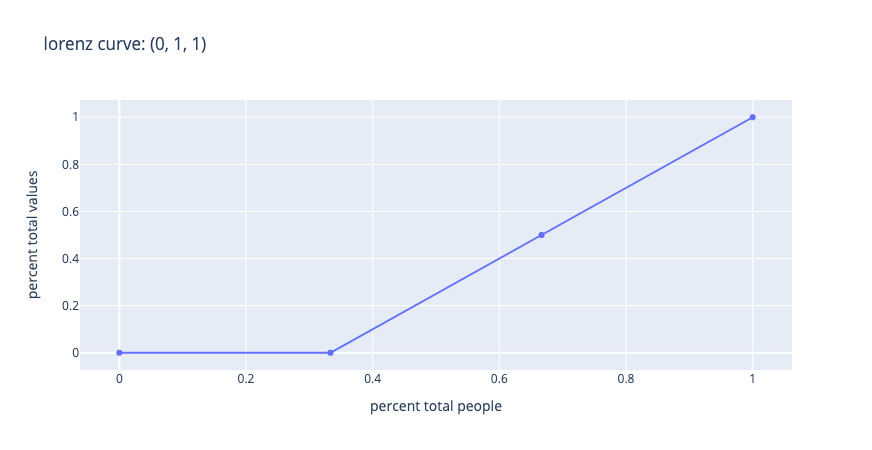

In [0]:
import plotly.graph_objects as go

mix_scatter = go.Scatter({'x': [0, 1/3, 2/3, 3/3], 'y': [0, 0, 1/2,1], 'name': '0, 1, 1'})
lorenz_fig = go.Figure([ mix_scatter], layout = {'title': 'lorenz curve: (0, 1, 1)', 'yaxis': {'title': 'percent total values'}, 
                             'xaxis': {'title': 'percent total people'}})
lorenz_fig

For the lorenz curve we start by calculating

Then we move through our population lowest to highest, calculating a running percentage of total values on the y axis, and a running percentage of the total population on the x axis.  

* So for the values $(0, 1, 1)$, we have the following:

* starting point
    * % total pop =  $\frac{pop\_so\_far}{total\_pop} = \frac{0}{0}= 0, \frac{vals\_so\_far}{total\_vals} = \frac{0}{0} = 0 \rightarrow (0, 0)$

* $0$
    * % total pop =  $\frac{pop\_so\_far}{total\_pop} = \frac{1}{3}= 0, \frac{vals\_so\_far}{total\_vals} = \frac{0}{2} = 0 \rightarrow (\frac{1}{3}, 0)$

* $1$
    * $\frac{pop\_so\_far}{total\_pop} = \frac{2}{3}, \frac{vals\_so\_far}{total\_vals} = \frac{1}{2} \rightarrow (\frac{2}{3}, \frac{1}{2})$

* $1$
    * $\frac{pop\_so\_far}{total\_pop} = \frac{3}{3}, \frac{vals\_so\_far}{total\_vals} = \frac{2}{2} \rightarrow (1, 1)$

Plotting these values, $(\frac{1}{3}, 0), (\frac{2}{3}, \frac{1}{2}), (1, 1)$, we get our lorenz curve:

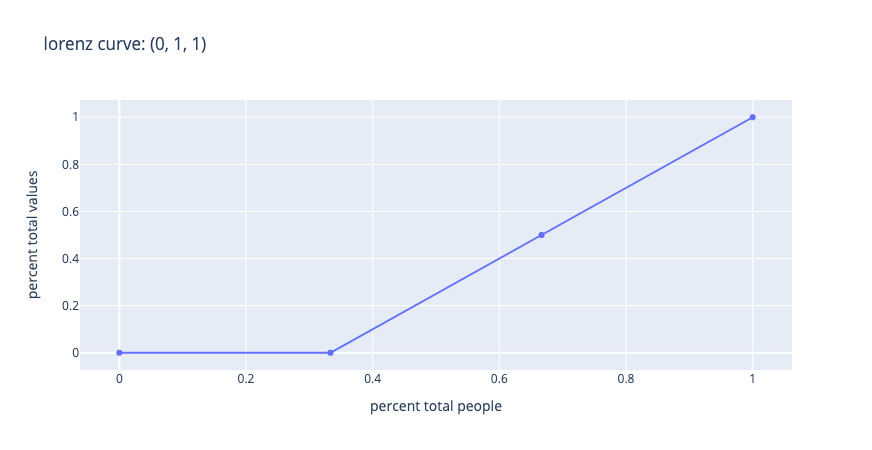

In [0]:
lorenz_fig

The lorenz curve really becomes valuable when plotted against the line of equality.  The line of equality is the line that we would plot if every value were exactly the same.  That is if where we had 1/3 the population we also had 1/3 the values.  Let's plot the two lines on the same plot.  

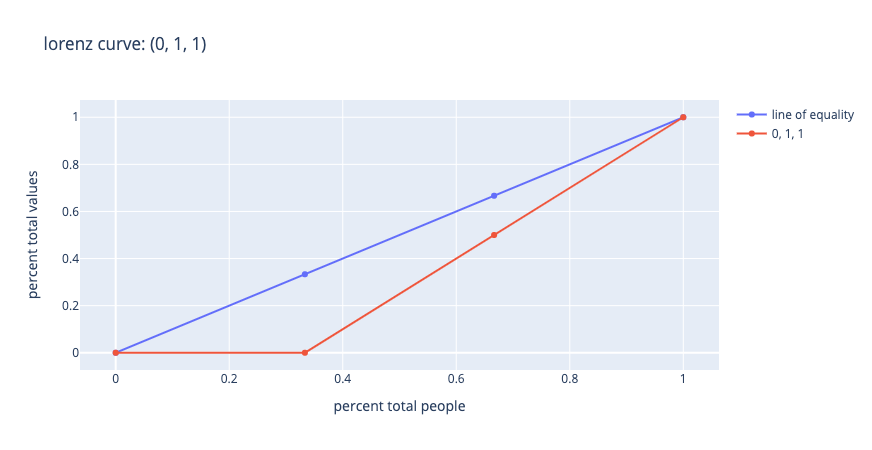

In [0]:
import plotly.graph_objects as go

mix_scatter = go.Scatter({'x': [0, 1/3, 2/3, 3/3], 'y': [0, 0, 1/2,1], 'name': '0, 1, 1'})
line_equality = go.Scatter({'x': [0, 1/3, 2/3, 3/3], 'y': [0, 1/3, 2/3, 1], 'name': 'line of equality'})
go.Figure([ line_equality, mix_scatter], layout = {'title': 'lorenz curve: (0, 1, 1)', 'yaxis': {'title': 'percent total values'}, 
                             'xaxis': {'title': 'percent total people'}})

The line of equality is always a straight line with slope equal to 1.  As we move through a portion of the total population in the x direction, we move through that same portion of the total values in the y direction.

Next, notice that the larger the difference between these two lines the larger the amount of inequality in our dataset.  The area between these two lines, divided by the total area under the line of equality, is the gini coefficient.  

$G = \frac{A}{A + B}$
* A = Area between line of equality and lorenz curve
* B = Area under line of equality

This is our new cost function.  The larger the gini coefficient, the less homogenous our subgrouping and the poorer the split.

So we want to continually split our data by finding the split that minimizes the gini coefficient, and thus has a more homogenous group.

### Summary

In this lesson, we learned about the gini coefficient.  The gini coefficient is the proportion of area between the line of equality and lorenz cuve, divided by the area under the line of equality.

We plot the two lines by drawing a plot where the $x$ axis describes a running percentage of the population, and the $y$ axis is a corresponding percentage of the values of that population.  For the line of equality, where all members of the population have an equal value, an increase in the percentage of the population will lead to a corresponding increase in the percentage of total values.  For the lorenz curve, we order our values from smallest to largest, plotting the running percentage of total population covered for the x values, and running percentage values covered for y values.

<center>
<a href="https://www.jigsawlabs.io/free" style="position: center"><img src="https://storage.cloud.google.com/curriculum-assets/curriculum-assets.nosync/mom-files/jigsaw-labs.png" width="15%" style="text-align: center"></a>
</center>